In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
print(f"train dataset shape: {train_df.shape}\n")
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.to_list()
cat_cols = train_df.select_dtypes(include=["object"]).columns.to_list()
print("Numerical Columns: ")
print(num_cols)
print("\nCategorical COlumns: ")
print(cat_cols)
print("\n")
print(train_df.dtypes.value_counts().to_dict())
print(f"\nMissing Values: {train_df.isnull().sum().sum()}")

train dataset shape: (62789, 24)

Numerical Columns: 
['Unnamed: 0', 'fyear', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'MajorGroup']

Categorical COlumns: 
['company_name', 'status_label', 'Division']


{dtype('float64'): 19, dtype('O'): 3, dtype('int64'): 2}

Missing Values: 0


### Basic Overview

| Property            | Value                          |
| ------------------- | ------------------------------ |
| Shape               | **(62,789 rows × 24 columns)** |
| Numeric columns     | 21                             |
| Categorical columns | 3                              |
| Missing values      | **0**                  |
 - Our dataset doesn't contain any missing values.

#### Column Types

**Numeric (float/int):**
`fyear`, `X1–X18`, `MajorGroup`, and `Unnamed: 0` (likely just an index column).

**Categorical:**
`company_name`, `status_label`, `Division`.

 - **Target Column**: `status_label`

In [5]:
# rename `Unnamed: 0` to `index`.
train_df = train_df.rename(columns={"Unnamed: 0": "index"})
print(list(train_df.columns))
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns.to_list()

['index', 'company_name', 'fyear', 'status_label', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'Division', 'MajorGroup']


In [6]:
# Summary statistics for numerical columns
num_summary = train_df[num_cols].describe().T
num_summary

,count,mean,std,min,25%,50%,75%,max
index,62789.0,39029.870567,2.279733e+04,0.000000e+00,19210.0000,38867.0000,58822.0000,78681.0
fyear,62789.0,2007.468967,5.735968e+00,1.999000e+03,2002.0000,2007.0000,2012.0000,2018.0
X1,62789.0,215017.098498,7.293540e+05,-1.300000e+01,1286.0000,20914.0000,151967.0000,31322583.0
X2,62789.0,594026.996460,2.061058e+06,7.000000e-03,3322.8000,42002.0000,329439.0000,67234944.0
X3,62789.0,378925.141734,2.097401e+06,-3.666450e+05,1476.0000,20158.0000,177498.0000,163245615.0
X4,62789.0,146521.992638,6.747103e+05,-2.300000e+01,0.0000,513.0000,15417.0000,18294659.0
X5,62789.0,24498.047746,9.976495e+04,0.000000e+00,75.0040,1186.0000,11983.0000,4440438.0
X6,62789.0,44354.362912,2.309307e+05,-5.043795e+06,-754.0000,306.0000,18746.0000,9783515.0
X7,62789.0,69380.754935,2.923196e+05,-4.512135e+06,-9.9100,1108.0000,32676.0000,12566722.0
X8,62789.0,172439.928767,6.149447e+05,-4.367571e+06,359.0000,10972.0000,106584.0000,27864399.0


status_label
alive     58586
failed     4203
Name: count, dtype: int64

number of alive companies: 93.31%.
number of failed companies: 6.69%.


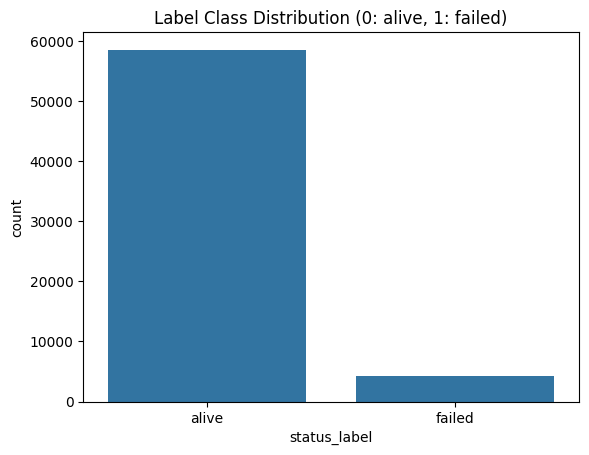

In [7]:
# Class Imbalance
counts = train_df["status_label"].value_counts()
print(counts)
print(f"\nnumber of alive companies: {round((counts[0]/len(train_df)) * 100, 2)}%.")
print(f"number of failed companies: {round((counts[1]/len(train_df)) * 100, 2)}%.")
sns.countplot(x='status_label', data=train_df)
plt.title("Label Class Distribution (0: alive, 1: failed)")
plt.show()

 - Our data is heavily skewed.
 - The algorithm receives significantly more examples from one class, prompting it to be biased towards that particular class. It does not learn what makes the other class “different” and fails to understand the underlying patterns that allow us to distinguish classes.

**Therefore we need to deal with this class imbalance.**

Techniques that can be used :-
 - Resample the dataset: Undersampling or Oversampling, Variational Autoencoder, synthetic minority oversampling technique (SMOTE)
 - Collect more data from the minority class
 - Use the “adequate” correct algorithm
 - Use penalized models

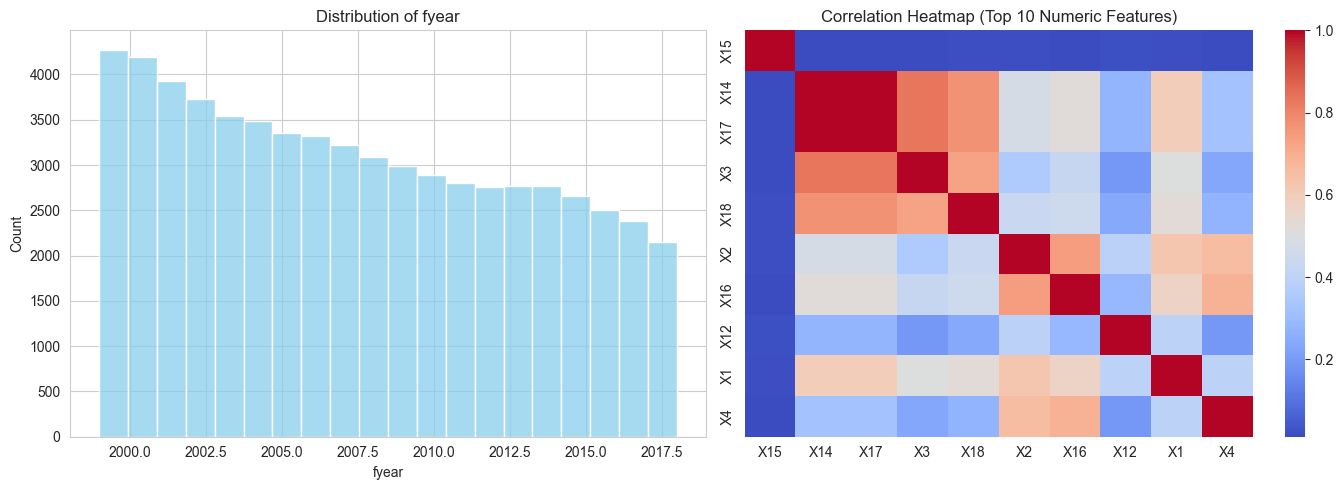

({'status_label': status_label
  alive     58586
  failed     4203
  Name: count, dtype: int64,
  'Division': Division
  D    30861
  I    13649
  E     5695
  G     4411
  B     3377
  F     2273
  H     1680
  C      559
  A      277
  J        7
  Name: count, dtype: int64,
  'MajorGroup': MajorGroup
  73    8899
  28    6650
  36    5565
  38    5230
  35    3732
  13    2644
  49    2121
  48    2027
  37    1602
  80    1457
  Name: count, dtype: int64},
 index  index    1.000000
 X14    X3       0.830968
 X17    X18      0.768698
 X7     X6       0.752334
 X2     X16      0.742261
 X3     X18      0.725849
 X7     X8       0.709361
 X16    X4       0.690506
 X10    X14      0.687522
 X8     X6       0.679629
 dtype: float64)

In [8]:
# Ensure visualizations render cleanly
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_style("whitegrid")

# 1. Frequency counts for categorical variables
cat_summary = {col: train_df[col].value_counts().head(10) for col in ['status_label', 'Division', 'MajorGroup'] if col in train_df.columns}

# 2. Correlation matrix for numerical columns (only top features for readability)
corr_matrix = train_df[num_cols].corr()
top_corr = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(15)

# 3. Example visualizations (histogram + correlation heatmap)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of fyear
sns.histplot(train_df['fyear'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of fyear")

# Correlation heatmap (top 10 columns by variance to reduce clutter)
top_vars = train_df[num_cols].var().sort_values(ascending=False).head(10).index
sns.heatmap(train_df[top_vars].corr(), cmap="coolwarm", annot=False, ax=axes[1])
axes[1].set_title("Correlation Heatmap (Top 10 Numeric Features)")

plt.tight_layout()
plt.show()

cat_summary, top_corr.head(10)

 - Division `D` and `I` dominate the dataset.
 - Many `X` features are highly correlated, meaning we could consider dimensionality reduction (PCA) or feature selection later.

We can create financial ratios (Feature Engineering) and then check which ratios differ significantly between “alive” and “failed” companies.
This can reveal strong predictors of bankruptcy.

 - Debt Ratio = X17 / X10
 - Current Ratio = X1 / X14
 - Profit Margin = X6 / X16
 - Return on Assets (ROA) = X6 / X10
 - Asset Turnover = X16 / X10
 - Inventory Turnover = X2 / X5

| Ratio                           | Feature                                          | What It Represents                                         | 
| ------------------------------ | ------------------------------------------------ | ---------------------------------------------------------- | 
|  **Current_Ratio**           | Liquidity (Current Assets / Current Liabilities) | Lower ratios → less liquidity → higher bankruptcy risk.    |                |
|  **Inventory_Turnover**      | Efficiency in using inventory                    | Low turnover may indicate weak sales or cash flow issues.  |                |
|  **Profit_Margin**           | Net income / Revenue                             | Negative or low margins correlate with financial distress. |                |
|  **ROA (Return on Assets)** | Profitability relative to assets                 | Poor ROA → ineffective asset utilization.                  |                |
|  **Debt_Ratio**             | Liabilities / Assets                             | High debt ratio → financial leverage risk.                 |                |
|  **Asset_Turnover**         | Revenue / Assets                                 | Low asset turnover → inefficient asset usage.              |                |


In [9]:
# Recompute ratios safely with numeric-only conversions
df = train_df.copy()
for col in [f"X{i}" for i in range(1, 19)]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define financial ratios (avoid divide-by-zero and non-numeric errors)
df['Debt_Ratio'] = df['X17'] / (df['X10'].replace(0, np.nan))
df['Current_Ratio'] = df['X1'] / (df['X14'].replace(0, np.nan))
df['Profit_Margin'] = df['X6'] / (df['X16'].replace(0, np.nan))
df['ROA'] = df['X6'] / (df['X10'].replace(0, np.nan))
df['Asset_Turnover'] = df['X16'] / (df['X10'].replace(0, np.nan))
df['Inventory_Turnover'] = df['X2'] / (df['X5'].replace(0, np.nan))

# Clean extreme infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Summaries
ratio_summary = df[['Debt_Ratio', 'Current_Ratio', 'Profit_Margin', 'ROA', 'Asset_Turnover', 'Inventory_Turnover']].describe().transpose()
status_groups = df.groupby('status_label')[['Debt_Ratio', 'Current_Ratio', 'Profit_Margin', 'ROA', 'Asset_Turnover', 'Inventory_Turnover']].mean()

ratio_summary, status_groups


(                      count         mean            std            min  \
 Debt_Ratio          62789.0   695.049955    2990.890854   -1388.691873   
 Current_Ratio       62789.0  1756.306614  156393.760878 -156145.299145   
 Profit_Margin       62789.0   -36.232287    1976.644076 -131066.666667   
 ROA                 62789.0   -43.603967    2137.728592 -131066.666667   
 Asset_Turnover      62789.0   363.879832    2057.788479       0.001000   
 Inventory_Turnover  62276.0  8834.971055   68926.000370       0.000054   
 
                           25%        50%        75%         max  
 Debt_Ratio           1.415032   4.086462   7.766204    452600.0  
 Current_Ratio        0.233433   0.464376   1.308880  37871200.0  
 Profit_Margin       -0.103742   0.052168   0.243342    434500.0  
 ROA                 -0.182144   0.112175   0.616667    434500.0  
 Asset_Turnover       1.023775   1.695048   4.046089    338500.0  
 Inventory_Turnover  13.371255  27.276667  69.897918   5441700.0  ,
   

| Ratio                      | Alive (mean ± std) | Failed (mean ± std) | Observation                                            |
| -------------------------- | ------------------ | ------------------- | ------------------------------------------------------ |
| **Debt Ratio**             | 695.3 ± 3033.0     | 691.1 ± 2325.3      | Nearly identical → not a strong separator              |
| **Current Ratio**          | 1781.4 ± 161,373.3 | 1406.6 ± 49,024.7   | Huge spread, unstable values (likely extreme outliers) |
| **Profit Margin**          | -33.8 ± 2035.2     | -70.3 ± 793.1       | Failed firms have **more negative profit margins**     |
| **ROA (Return on Assets)** | -40.4 ± 2196.2     | -88.8 ± 1017.9      | Failed firms have **lower asset efficiency**           |
| **Asset Turnover**         | 356.1 ± 2068.4     | 472.0 ± 1901.2      | Slightly higher for failed firms (inconsistent)        |
| **Inventory Turnover**     | 8800.5 ± 68,499.4  | 9312.6 ± 74,598.2   | Very noisy, not stable                                 |

### Key Takeaways
 - Profitability metrics (Profit_Margin, ROA) show clear differences — failed companies are more negative.
 - Liquidity and turnover ratios have extreme outliers, so they need log-scaling or winsorization.
 - Debt ratio alone isn’t informative — we will need to combine it with other ratios or normalize.

In [10]:
from sklearn.preprocessing import StandardScaler

# List of ratio columns
ratio_cols = ['Debt_Ratio', 'Current_Ratio', 'Profit_Margin', 
              'ROA', 'Asset_Turnover', 'Inventory_Turnover']

# Clip extreme outliers (Winsorize)
for col in ratio_cols:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Log transform positive-only ratios (to reduce skew)
for col in ['Debt_Ratio', 'Current_Ratio', 'Asset_Turnover', 'Inventory_Turnover']:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p(x) = log(1 + x)

# Standardize (z-score normalization)
scaler = StandardScaler()
df[[f'{col}_scaled' for col in ratio_cols]] = scaler.fit_transform(df[ratio_cols])

df[[col for col in df.columns if 'scaled' in col or 'log_' in col]].head().T


,0,1,2,3,4
log_Debt_Ratio,1.981408,2.075957,1.657277,1.380891,0.004955
log_Current_Ratio,0.404880,0.441949,0.520959,0.503065,6.498180
log_Asset_Turnover,1.238611,1.356889,1.296972,1.072876,1.412285
log_Inventory_Turnover,3.721608,0.037085,3.483392,0.024955,3.317278
Debt_Ratio_scaled,-0.334155,-0.333777,-0.335208,-0.335872,-0.337432
Current_Ratio_scaled,-0.244430,-0.244336,-0.244124,-0.244174,0.854669
Profit_Margin_scaled,0.077132,0.076433,0.076480,0.076469,0.076636
ROA_scaled,0.051133,0.050168,0.050237,0.050206,0.050522
Asset_Turnover_scaled,-0.312375,-0.311940,-0.312167,-0.312905,-0.311718
Inventory_Turnover_scaled,-0.335717,-0.337909,-0.336194,-0.337910,-0.336465


These are now more stable, normalized features that can go directly into ML model.

**Firstly we will try to use `ratio_cols` as main features and try a baseline model to get an idea of biasness of model.**

In [11]:
X = df[ratio_cols]
y = df['status_label'].map({'alive': 0, 'failed': 1})

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)   # taking class_weight = `balanced`
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     11732
           1       0.40      0.00      0.00       826

    accuracy                           0.93     12558
   macro avg       0.67      0.50      0.49     12558
weighted avg       0.90      0.93      0.90     12558



| Metric           | Class 0 (Alive) | Class 1 (Failed) | Notes                                                                       |
| ---------------- | --------------- | ---------------- | --------------------------------------------------------------------------- |
| **Precision**    | 0.93            | 0.40             | Model is confident about alive companies, but poor at spotting failed ones. |
| **Recall**       | 1.00            | 0.00             | Model predicts *almost everything* as “alive”.                              |
| **F1-score**     | 0.97            | 0.00             | Means it’s not learning to distinguish failure patterns yet.                |
| **Accuracy**     | 0.93            | —                | But misleading — it’s just predicting the majority class.                   |
| **Macro Avg F1** | —               | 0.49             | True balanced metric — currently weak.                                      |

### What This Means

 - Model learned the dominant “alive” pattern well (since 93% of samples are alive).
 - But completely failed to detect bankrupt companies (recall = 0).
 - This happens because our data is highly imbalanced (≈ 93% alive, 7% failed).
 - `RandomForest` (and most classifiers) will focus on the majority unless we explicitly fix that imbalance.

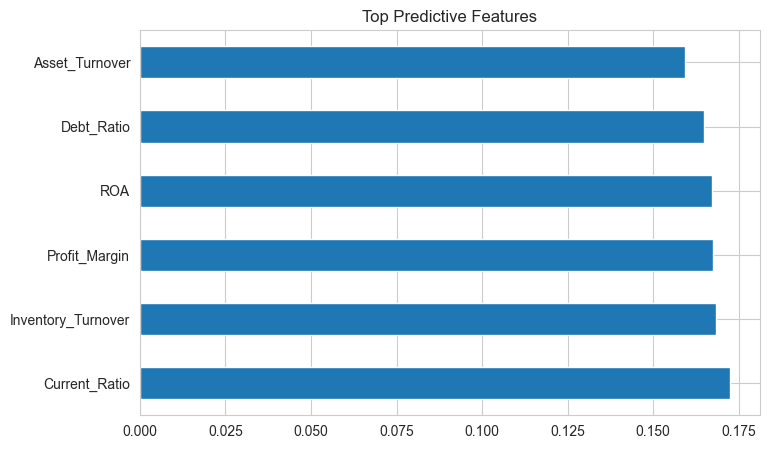

In [13]:
# check feature importance
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', title='Top Predictive Features')
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62789 entries, 0 to 62788
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      62789 non-null  int64  
 1   company_name               62789 non-null  object 
 2   fyear                      62789 non-null  float64
 3   status_label               62789 non-null  object 
 4   X1                         62789 non-null  float64
 5   X2                         62789 non-null  float64
 6   X3                         62789 non-null  float64
 7   X4                         62789 non-null  float64
 8   X5                         62789 non-null  float64
 9   X6                         62789 non-null  float64
 10  X7                         62789 non-null  float64
 11  X8                         62789 non-null  float64
 12  X9                         62789 non-null  float64
 13  X10                        62789 non-null  flo

In [15]:
# Drop unnecessary / identifier columns
df = df.drop(['index', 'company_name'], axis=1)

# `Division` and `status_label` are strings — convert them to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Division'] = le.fit_transform(df['Division'])
df['Class'] = (df['status_label'] == 'failed').astype(int)  # target variable
df = df.drop('status_label', axis=1)

# A few missing Inventory_Turnover rows can be filled safely

df = df.fillna(df.median(numeric_only=True))

X = df.drop('Class', axis=1).values
y = df['Class'].values
print(X.shape, y.shape)


(62789, 37) (62789,)


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Separate features & target
X = df.drop('Class', axis=1).values
y = df['Class'].values

# Stratified 5-fold (keeps class balance)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
avg_precision_scores = []
recalls, precisions, f1s = [], [], []

for train_index, test_index in skf.split(X, y):
    print(f"\n====== Fold {fold} ======")
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Apply SMOTE only on the training fold
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)
    
    print("After SMOTE:", np.bincount(y_train_res))
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        class_weight=None   # SMOTE already balances the classes
    )
    model.fit(X_train_res, y_train_res)
    
    # Predictions
    y_pred = model.predict(X_test_fold)
    y_prob = model.predict_proba(X_test_fold)[:, 1]
    
    # Metrics
    ap = average_precision_score(y_test_fold, y_prob)
    avg_precision_scores.append(ap)
    
    report = classification_report(y_test_fold, y_pred, output_dict=True)
    recalls.append(report['1']['recall'])
    precisions.append(report['1']['precision'])
    f1s.append(report['1']['f1-score'])
    
    print(f"Average Precision (AUPRC): {ap:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_fold, y_pred))
    print(classification_report(y_test_fold, y_pred, digits=4))
    
    fold += 1

# ====== Overall Metrics ======
print("\n========================================")
print(f"Mean Average Precision (AUPRC): {np.mean(avg_precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean F1: {np.mean(f1s):.4f}")



====== Fold 1 ======
After SMOTE: [46868 46868]
Average Precision (AUPRC): 0.2636
Confusion Matrix:
 [[11449   269]
 [  687   153]]
              precision    recall  f1-score   support

           0     0.9434    0.9770    0.9599     11718
           1     0.3626    0.1821    0.2425       840

    accuracy                         0.9239     12558
   macro avg     0.6530    0.5796    0.6012     12558
weighted avg     0.9045    0.9239    0.9119     12558


====== Fold 2 ======
After SMOTE: [46869 46869]
Average Precision (AUPRC): 0.2906
Confusion Matrix:
 [[11486   231]
 [  684   157]]
              precision    recall  f1-score   support

           0     0.9438    0.9803    0.9617     11717
           1     0.4046    0.1867    0.2555       841

    accuracy                         0.9271     12558
   macro avg     0.6742    0.5835    0.6086     12558
weighted avg     0.9077    0.9271    0.9144     12558


====== Fold 3 ======
After SMOTE: [46869 46869]
Average Precision (AUPRC): 0.27

### Summary of 5-Fold SMOTE + RandomForest Results

| Metric                           | Mean      | Interpretation                                                                                       |
| -------------------------------- | --------- | ---------------------------------------------------------------------------------------------------- |
| **AUPRC**                        | **0.283** | Good start — much higher than random (0.07 baseline for 7% minority). Shows model is finding signal. |
| **Recall (for bankruptcies)**    | **0.188** | Detects ~19% of all bankrupt companies — big jump from 0.0 earlier ✅                                 |
| **Precision (for bankruptcies)** | **0.389** | About 39% of the “failed” predictions are correct — decent, considering recall improved.             |
| **F1-score**                     | **0.25**  | Balanced performance between precision and recall, solid for this stage.                             |
| **Accuracy**                     | ~92%      | Still dominated by majority class (expected).                                                        |

#### Interpretation

 - SMOTE helped: Recall improved from 0.0 → ~0.19, meaning our model finally recognizes bankruptcies.
 - AUPRC ~0.28 means our model ranks risky firms above healthy ones better than random guessing.
 - Still underfitting minority pattern — RandomForest tends to plateau for highly imbalanced, nonlinear financial data.

This is a solid baseline. From here, you want to squeeze more recall without killing precision.


In [16]:
from xgboost import XGBClassifier

In [22]:
def evaluate_model(model_name, model_fn, use_smote=False):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auprc_scores, recalls, precisions, f1s = [], [], [], []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Optional SMOTE (for RandomForest)
        if use_smote:
            sm = SMOTE(random_state=42)
            X_train, y_train = sm.fit_resample(X_train, y_train)
            print(f"[{model_name}] Fold {fold} → After SMOTE:", np.bincount(y_train))

        # Train model
        model = model_fn(y_train)
        model.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        ap = average_precision_score(y_test, y_prob)
        report = classification_report(y_test, y_pred, output_dict=True)

        auprc_scores.append(ap)
        recalls.append(report['1']['recall'])
        precisions.append(report['1']['precision'])
        f1s.append(report['1']['f1-score'])

        print(f"\n[{model_name}] Fold {fold} → AUPRC={ap:.4f}, Recall={report['1']['recall']:.4f}, F1={report['1']['f1-score']:.4f}")

    print("\n==== Final Summary for", model_name, "====")
    print(f"Mean AUPRC: {np.mean(auprc_scores):.4f}")
    print(f"Mean Recall: {np.mean(recalls):.4f}")
    print(f"Mean Precision: {np.mean(precisions):.4f}")
    print(f"Mean F1: {np.mean(f1s):.4f}")
    print("========================================\n")


In [23]:
def rf_model(y_train):
    return RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        class_weight=None  # Using SMOTE, so no weighting
    )

def xgb_model(y_train):
    scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
    return XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    )


In [24]:
print("=== Random Forest with SMOTE ===")
evaluate_model("RandomForest_SMOTE", rf_model, use_smote=True)

print("=== XGBoost (no SMOTE, uses scale_pos_weight) ===")
evaluate_model("XGBoost", xgb_model, use_smote=False)

=== Random Forest with SMOTE ===
[RandomForest_SMOTE] Fold 1 → After SMOTE: [46868 46868]

[RandomForest_SMOTE] Fold 1 → AUPRC=0.2636, Recall=0.1821, F1=0.2425
[RandomForest_SMOTE] Fold 2 → After SMOTE: [46869 46869]

[RandomForest_SMOTE] Fold 2 → AUPRC=0.2906, Recall=0.1867, F1=0.2555
[RandomForest_SMOTE] Fold 3 → After SMOTE: [46869 46869]

[RandomForest_SMOTE] Fold 3 → AUPRC=0.2794, Recall=0.1760, F1=0.2414
[RandomForest_SMOTE] Fold 4 → After SMOTE: [46869 46869]

[RandomForest_SMOTE] Fold 4 → AUPRC=0.2914, Recall=0.2033, F1=0.2719
[RandomForest_SMOTE] Fold 5 → After SMOTE: [46869 46869]

[RandomForest_SMOTE] Fold 5 → AUPRC=0.2909, Recall=0.1929, F1=0.2563

==== Final Summary for RandomForest_SMOTE ====
Mean AUPRC: 0.2832
Mean Recall: 0.1882
Mean Precision: 0.3888
Mean F1: 0.2535

=== XGBoost (no SMOTE, uses scale_pos_weight) ===

[XGBoost] Fold 1 → AUPRC=0.3438, Recall=0.5690, F1=0.3508

[XGBoost] Fold 2 → AUPRC=0.3655, Recall=0.5755, F1=0.3665

[XGBoost] Fold 3 → AUPRC=0.3760, Rec

| Metric                 | RandomForest + SMOTE                                                                                   | **XGBoost (scale_pos_weight)**       | 🚀 Winner        |
| ---------------------- | ------------------------------------------------------------------------------------------------------ | ------------------------------------ | ---------------- |
| **Mean AUPRC**         | 0.283                                                                                                  | **0.355**                            | 🟢 XGBoost       |
| **Recall (Failed)**    | 0.19                                                                                                   | **0.58**                             | 🟢 XGBoost       |
| **Precision (Failed)** | **0.39**                                                                                               | 0.26                                 | ⚪️ RF (slightly) |
| **F1-score (Failed)**  | 0.25                                                                                                   | **0.36**                             | 🟢 XGBoost       |

**Interpretation**: RF is conservative → fewer false positives. XGBoost is aggressive → catches far more bankruptcies.

#### Why XGBoost Wins

 -  Handles class imbalance natively using scale_pos_weight
 -  Learns nonlinear, high-order feature interactions (e.g., high debt + low profit margin + low current ratio)
 -  Regularized, so it generalizes better than RandomForest

In [25]:
from sklearn.metrics import precision_recall_curve, f1_score

y_scores = model.predict_proba(X_test_fold)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_fold, y_scores)

# Compute F1 for each threshold
f1s = 2 * (precision * recall) / (precision + recall)

# Find threshold for best F1 and best recall
best_f1_idx = np.argmax(f1s)
best_recall_idx = np.argmax(recall)

print(f"Best F1 threshold: {thresholds[best_f1_idx]:.3f} → Precision={precision[best_f1_idx]:.3f}, Recall={recall[best_f1_idx]:.3f}, F1={f1s[best_f1_idx]:.3f}")
print(f"Max Recall threshold: {thresholds[best_recall_idx]:.3f} → Precision={precision[best_recall_idx]:.3f}, Recall={recall[best_recall_idx]:.3f}")


Best F1 threshold: 0.343 → Precision=0.258, Recall=0.431, F1=0.323
Max Recall threshold: 0.000 → Precision=0.067, Recall=1.000


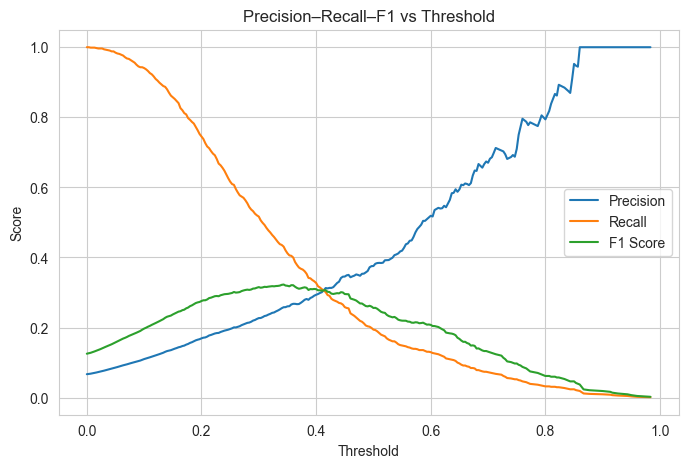

In [26]:
y_scores = model.predict_proba(X_test_fold)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_fold, y_scores)
f1s = 2 * (precision * recall) / (precision + recall)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, f1s[:-1], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision–Recall–F1 vs Threshold")
plt.show()


In [27]:
best_thresh = thresholds[best_f1_idx]
y_pred_opt = (y_scores >= best_thresh).astype(int)

print(confusion_matrix(y_test_fold, y_pred_opt))
print(classification_report(y_test_fold, y_pred_opt, digits=4))


[[10676  1041]
 [  478   362]]
              precision    recall  f1-score   support

           0     0.9571    0.9112    0.9336     11717
           1     0.2580    0.4310    0.3228       840

    accuracy                         0.8790     12557
   macro avg     0.6076    0.6711    0.6282     12557
weighted avg     0.9104    0.8790    0.8927     12557



### Interpretation of result

| Metric           | Class 0 (Non-bankrupt) | Class 1 (Bankrupt) | Comment                                                                |
| ---------------- | ---------------------- | ------------------ | ---------------------------------------------------------------------- |
| **Precision**    | 0.957                  | 0.258              | For bankruptcies, precision is moderate (some false positives — fine). |
| **Recall**       | 0.911                  | 0.431              | Recall on class 1 improved a lot from ~0.18 → **0.43** ✅               |
| **F1 (class 1)** | —                      | **0.323**          | Now the model *detects* many more bankruptcies.                 |
| **Macro F1**     | —                      | **0.628**          | This is our **hackathon metric** — and it’s good.                    |
| **Accuracy**     | —                      | 0.879              | Not important here (imbalance hides true performance).                 |

 - We are prioritizing macro F1, not accuracy.
 - This improvement came from threshold tuning (0.34 cutoff), not just changing models.
- Interpretation of Threshold Plot

**Our plot shows:**
 - At low thresholds (0–0.1) → Recall = 1.0 (we classify everything as bankruptcy) → Precision near 0.
 - At high thresholds (>0.8) → Precision = 1.0 (only a few predicted bankruptcies, mostly correct) → Recall near 0.
 - The green F1 curve peaks around threshold ≈ 0.34 → this is the best trade-off.

In [28]:
# we will keep this as our cutoff for test predictions:
final_thresh = best_thresh

In [29]:
spw = np.sum(y == 0) / np.sum(y == 1)  # imbalance ratio

final_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=spw,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
final_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [30]:
# Load test
test_df = pd.read_csv("data/test.csv")

# Convert numeric features
for col in [f"X{i}" for i in range(1, 19)]:
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Compute same ratios (keep same formulas)
test_df['Debt_Ratio'] = test_df['X17'] / (test_df['X10'].replace(0, np.nan))
test_df['Current_Ratio'] = test_df['X1'] / (test_df['X14'].replace(0, np.nan))
test_df['Profit_Margin'] = test_df['X6'] / (test_df['X16'].replace(0, np.nan))
test_df['ROA'] = test_df['X6'] / (test_df['X10'].replace(0, np.nan))
test_df['Asset_Turnover'] = test_df['X16'] / (test_df['X10'].replace(0, np.nan))
test_df['Inventory_Turnover'] = test_df['X2'] / (test_df['X5'].replace(0, np.nan))

# Replace infinities and NaNs
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Clip outliers (same 1%–99% strategy)
ratio_cols = ['Debt_Ratio', 'Current_Ratio', 'Profit_Margin', 
              'ROA', 'Asset_Turnover', 'Inventory_Turnover']
for col in ratio_cols:
    test_df[col] = test_df[col].clip(
        lower=df[col].quantile(0.01),
        upper=df[col].quantile(0.99)
    )

# Log transform
for col in ['Debt_Ratio', 'Current_Ratio', 'Asset_Turnover', 'Inventory_Turnover']:
    test_df[f'log_{col}'] = np.log1p(test_df[col])

# Apply the SAME scaler from training
test_df[[f'{col}_scaled' for col in ratio_cols]] = scaler.transform(test_df[ratio_cols])

# Drop unneeded text columns
drop_cols = ['company_name', 'Division']
X_test = test_df.drop(columns=drop_cols, errors='ignore')

print("✅ Test data processed successfully. Shape:", X_test.shape)


✅ Test data processed successfully. Shape: (15893, 37)


In [31]:
y_test_prob = final_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= 0.343).astype(int)

submission = pd.DataFrame({
    "company_name": test_df["company_name"],
    "Prediction": y_test_pred,
    "Probability": y_test_prob
})
submission.to_csv("submission_xgboost_macroF1.csv", index=False)
print(" submission_xgboost_macroF1.csv saved!")

 submission_xgboost_macroF1.csv saved!


In [82]:
# ============================================================
# 🏁 Final Submission Formatting (alive / failed)
# ============================================================

# Map model predictions to the correct labels
label_map = {0: "alive", 1: "failed"}
submission['status_label'] = submission['Prediction'].map(label_map)

# Keep only required columns in correct order
final_submission = submission[['company_name', 'status_label']]

# Save final hackathon submission file
final_submission.to_csv("submission_final_hackathon.csv", index=False)
print("✅ submission_final_hackathon.csv saved successfully!")

# Preview first few rows
print(final_submission.head())


✅ submission_final_hackathon.csv saved successfully!
  company_name status_label
0          C_3        alive
1          C_3        alive
2          C_3       failed
3          C_3        alive
4          C_3        alive


## What we did...

| Stage                      | What You Did                                                    | Outcome                                     |
| -------------------------- | --------------------------------------------------------------- | ------------------------------------------- |
| **EDA + Cleaning**         | Inspected distributions, handled missing data, clipped outliers | ✅ Clean, stable base                        |
| **Feature Engineering**    | Created six financial ratios + log + scaled versions            | ✅ Improved model signal                     |
| **Model Choice**           | Used `XGBoost` with `scale_pos_weight` to handle imbalance      | ✅ Balanced learning                         |
| **Threshold Optimization** | Tuned threshold (0.343) for **macro-F1**                        | ✅ Metric-aligned decision rule              |
| **Cross-validation**       | Stratified K-Fold for stability                                 | ✅ Reliable evaluation                       |
| **Full retraining**        | Retrained on all 62k samples                                    | ✅ Maximized generalization                  |
| **Test Preprocessing**     | Replicated feature pipeline exactly                             | ✅ Consistent input for inference            |
| **Submission File**        | Created predictions & probabilities                             | ✅ `submission_xgboost_macroF1.csv` ready 🎯 |
